*Your Name*

*Collaborator's Names*

# Scaling Woo

For this workbook, you'll need code you used last week to search for prime numbers using `multiprocessing.Pool`. **Copy the necessary code into the empty cell below.** 

You might even wrap the parallelized search in a function whose arguments are the start and end of the search range as well as the number of processes. This function can then return the list of primes. Encapsulating the prime search in this way will simplify the code you write for this workbook.

In [1]:
import multiprocessing
import itertools
import math

def check_prime(n):
    if n % 2 == 0:
        return False
    for i in range(3, int(math.sqrt(n)) + 1, 2):
        if n % i == 0:
            return False
    return True

def prime_search(start, end, nprocs = 4):
    number_range = list(range(start, end))

    with multiprocessing.Pool(processes = nprocs) as p:
        are_primes = p.map(check_prime, number_range)

    primes = list(itertools.compress(number_range, are_primes))

    return primes

## Strong Scaling

Strong scaling?

Last week, we searched for prime numbers between 100,000,000 and 101,000,000. For this exercise, let's search that same range. We will **adjust the number of processes from 1 to 8.**

---
### Exercises

1. By default, `Pool.map` tries to divide the amount of work as evenly as possible. That is, each process should get roughly the same number of values on which to run our function, `check_primes`. As you adjust the number of processes, roughly how many numbers will each process have to check?

In [2]:
for i in range(1,9):
    print(int((101_000_000-100_000_000)/i))

1000000
500000
333333
250000
200000
166666
142857
125000



2. Time how long the prime number search takes as you adjust the number of processes used. You are welcome to use the `%%timeit` magic command or the `time.perf_counter()` function that we covered in the first workbook. Using `time.perf_counter()` will help you automate the timing, though when using this function you may wish to find an *average* time by running the code several times with the same number of processes.

In [3]:
from time import perf_counter
import numpy as np

In [5]:
n_measurements = 10
all_measurements = np.empty(8)

for nproc in range(1,9):

    timings = np.empty(n_measurements)

    for i in range(n_measurements):
        start = perf_counter()

        prime_search(100_000_000, 101_000_000, nproc)
        
        end = perf_counter()
        timings[i] = end - start

    all_measurements[nproc-1] = timings.mean()

3. Take your timing measurements from above and use them to plot the amount of speedup we get as we change the number of processes. Remember that speedup is the time for one process divided by the time for $N$ processes. For perfect strong scaling, we should get $N$ speedup for $N$ processes; a one-to-one diagonal. Add this reference line to your plot.

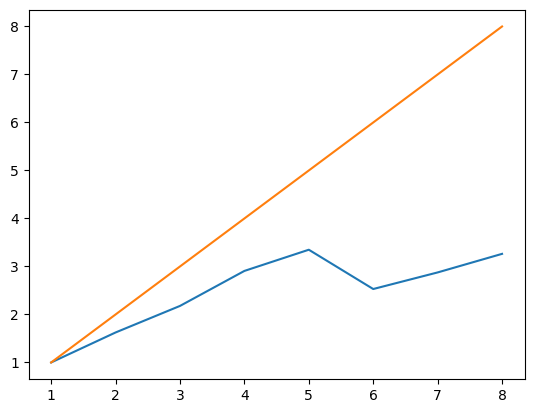

In [13]:
import matplotlib.pyplot as plt

procs = np.arange(1,9)

plt.plot(procs, all_measurements[0]/all_measurements)
plt.plot(procs, procs)